# Determination of the expected displacement [%]
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.
The estimated percentage of false positives among all localizations [%]. Swift uses this value in
combination with the intensity of a localization (if it is available) to determine its individual
likelihood to be noise.

## Choose a localization software


In [1]:
from pySPT.widgets import widgetExpNoiseRate
from pySPT.widgets import widgetDirectoryStructure
from pySPT.widgets import widgetColumnSort
from pySPT.preAnalysis import expNoiseRate
widget_exp_noise_rate = widgetExpNoiseRate.WidgetExpNoiseRate()
display(widget_exp_noise_rate.software_button)

RadioButtons(options=('ThunderSTORM', 'rapidSTORM'), value='ThunderSTORM')

## Load files
### Define a cell directory
Define a directory of localized cell measurements (Example path: F:\data_folder). All files with fitting ending (.txt or .csv and no "tracked" in file name) will be loaded.

In [2]:
widget_dir_structure = widgetDirectoryStructure.WidgetDirStructure()
display(widget_exp_noise_rate.dir_box, widget_exp_noise_rate.dir_button)
widget_exp_noise_rate.dir_button.on_click(widget_exp_noise_rate.open_dir)
widget_exp_noise_rate.dir_box.observe(widget_exp_noise_rate.change_dir_box)

Text(value='', description='Directory', placeholder='directory to be searched in', style=DescriptionStyle(desc…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

### Define a background directory
Define a directory of localized background measurements. All files with fitting ending (.txt or .csv and no "tracked" in file name) will be loaded.

In [3]:
display(widget_exp_noise_rate.dir_box_bg, widget_exp_noise_rate.dir_button_bg)
widget_exp_noise_rate.dir_button_bg.on_click(widget_exp_noise_rate.open_dir_bg)
widget_exp_noise_rate.dir_box_bg.observe(widget_exp_noise_rate.change_dir_box_bg)

Text(value='', description='Directory', placeholder='directory to be searched in', style=DescriptionStyle(desc…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

## Areas
### Cell sizes
Choose/insert the complete directory for the roi.log file which contains the cell sizes (e.g. F:\data_folder\roi.log). The file name of the cell with no .* ending is compared with the roi entries with no .* ending. The last fitting entry is taken as the cell size. 

In [4]:
display(widget_exp_noise_rate.roi_text_box, widget_exp_noise_rate.roi_button)
widget_exp_noise_rate.roi_button.on_click(widget_exp_noise_rate.open_file)
widget_exp_noise_rate.roi_text_box.observe(widget_exp_noise_rate.change_roi_box)

Text(value='', description='Complete path', placeholder='insert path of roi.log', style=DescriptionStyle(descr…

Button(description='browse', style=ButtonStyle(), tooltip='browse for file')

### Background sizes
Area of detection on the camera chip in px^2 (e.g. 256 * 256 = 65536 pixel).

In [5]:
display(widget_exp_noise_rate.background_size_box)

Text(value='65536', description='Area of camera in px²', placeholder='insert area', style=DescriptionStyle(des…

## Run analysis

Button(description='run', style=ButtonStyle(), tooltip='run the analysis')

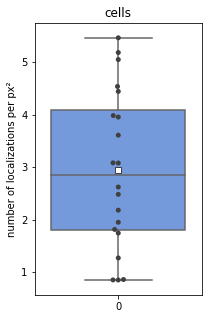

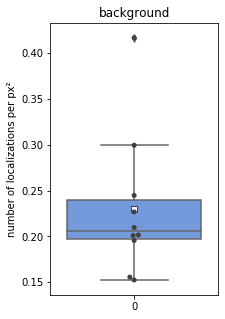

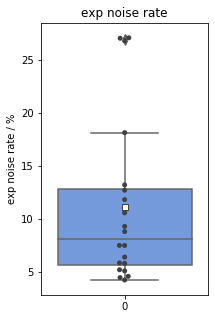

name: locs/px², exp noise rate:
Fab_CS2_cell01: 0.8503051842694893, 27.088088507459695
Fab_CS2_cell02: 0.851645101663586, 27.045470049497478
Fab_CS2_cell03: 0.8594019101299515, 26.801362457247592
Fab_CS2_cell04: 1.2703776767590131, 18.130940515741656
Fab_CS2_cell05: 1.7448296057688788, 13.200797380838763
Fab_CS2_cell06: 1.9507916264891598, 11.807074511231372
Fab_CS2_cell07: 1.8141458348787183, 12.696411527127086
Fab_CS2_cell08: 2.6219861660079054, 8.784616177023073
Fab_CS2_cell09: 2.483056018876368, 9.276126641825304
Fab_CS2_cell10: 2.1813908676865585, 10.558924780991315
Fab_CS2_cell11: 3.079597020462913, 7.479271455582036
Fab_CS2_cell12: 3.0826097541183155, 7.471961723040632
Fab_CS2_cell13: 3.6109656777196046, 6.378665472220614
Fab_CS2_cell14: 3.983977582986061, 5.781443697928642
Fab_CS2_cell15: 3.9563438411727034, 5.821825153350796
Fab_CS2_cell16: 5.185830874746159, 4.4415528863484575
Fab_CS2_cell17: 4.539142347671031, 5.074337909156281
Fab_CS2_cell18: 5.05196261682243, 4.55924634381

In [6]:
exp_noise_rate = expNoiseRate.ExpNoiseRate()
display(widget_exp_noise_rate.run_button)
def run_analysis(event):
    exp_noise_rate.run_exp_noise_rate(widget_exp_noise_rate.dir_name, widget_exp_noise_rate.dir_name_bg, widget_exp_noise_rate.roi_path, widget_exp_noise_rate.determine_suffix(), int(widget_exp_noise_rate.background_size_box.value))
widget_exp_noise_rate.run_button.on_click(run_analysis)

## Save analysis
The results will be saved in two .txt files, the first with the cell names localization densities and exp noise rates, the second with the background names and localization densities. Optionally the plots can be saved as .pdf. Choose a directory and folder name.

In [7]:
display(widget_exp_noise_rate.box_foldername, widget_exp_noise_rate.dir_box_save, widget_exp_noise_rate.dir_button_save)
widget_exp_noise_rate.dir_button_save.on_click(widget_exp_noise_rate.open_dir_save)
widget_exp_noise_rate.dir_box_save.observe(widget_exp_noise_rate.change_dir_box_save)

Text(value='exp_noise_rate', description='Foldername', placeholder='name of folder', style=DescriptionStyle(de…

Text(value='', description='Directory', placeholder='Directory to save', style=DescriptionStyle(description_wi…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [8]:
display(widget_exp_noise_rate.save_fig_checkbox, widget_exp_noise_rate.save_button)
def save_analysis(event):
    widget_exp_noise_rate.create_clear_output()
    display(widget_exp_noise_rate.save_fig_checkbox, widget_exp_noise_rate.save_button)
    exp_noise_rate.save_results(widget_exp_noise_rate.dir_box_save.value, widget_exp_noise_rate.box_foldername.value, widget_exp_noise_rate.save_fig_checkbox.value)
widget_exp_noise_rate.save_button.on_click(save_analysis)

Checkbox(value=True, description='Save plot')

Button(description='save', style=ButtonStyle(), tooltip='save the results')